In [1]:
import music21
import numpy
Note = music21.note.Note
Duration = music21.duration.Duration
Stream = music21.stream.Stream

In [ ]:
# note with pitch space number 60 and dur. 1/4 note
n1 = Note(60)
n1.duration = Duration(1.0)
print(n)
n2 = Note(61)
n2.duration = Duration(1.0)
notes = [n1,n2]
stream = Stream()
stream.append(notes)
stream.show()
sp = music21.midi.realtime.StreamPlayer(stream)
sp.play()    

In [ ]:
import numpy as np
notes = []
for pitch in np.linspace(60,62,8):
    n = Note(pitch)
    n.duration = Duration(1.0)
    notes.append(n)
stream = Stream()
stream.append(notes)
stream.show()
sp = music21.midi.realtime.StreamPlayer(stream)
sp.play()

'''
haven't figured out how to have music21 understand weird durations
beaming and automatic tupling is a little strange
'''

In [ ]:
'''
primitive pieces that Xenakis calls
"Residual Classes"

3@0
start at 0, move up by 3's
[0,3,6,9,...]
3@1
[1,4,7,10,...]
4@0
[0,4,8,12,...]

Sieve is specified by a collection of
residual classes, combined with some set
of allowed operators

a small bit of set theory

Whole Space = {a,b,c,d,e}
A={b,a,c}
B={b,c,d}
A union B = {a,b,c,d} (either)
A intersect B = {b,c} (both)
Complement(A) = {d,e} (whole space minus A)
A Setminus B = {a}

| (union)
& (intersection)
- (complement)

3@0|3@1
[0,1,3,4,6,7,9,10,....]

11@0|7@1

a@b|c@d
if a and c are relatively prime,
then we won't repeat the whole sub-sequence
until a*c notes go by
'''



[30, 31, 33, 34, 36, 37, 38, 39, 40, 42, 43, 45, 46, 48, 49, 50]
[1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1]


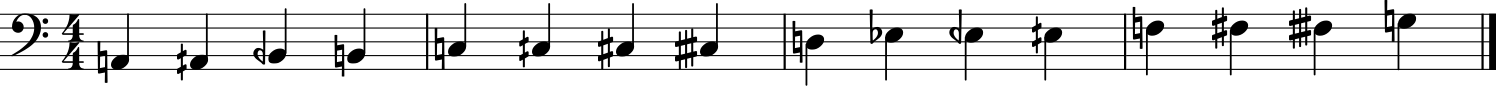

In [5]:
sieve = music21.sieve.Sieve('{3@0|3@1|4@2}')
sieve.setZRange(30,50)
pitch_nums = sieve.segment()
print(pitch_nums)
intervals = sieve.segment(segmentFormat = 'width')
print(intervals)
notes = []
unit = 0.50
for i,p in enumerate(pitch_nums):
    n = Note(p*unit + 30)
    n.duration = Duration(1.0)
    notes.append(n)
stream1 = Stream()
stream1.append(notes)
stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()

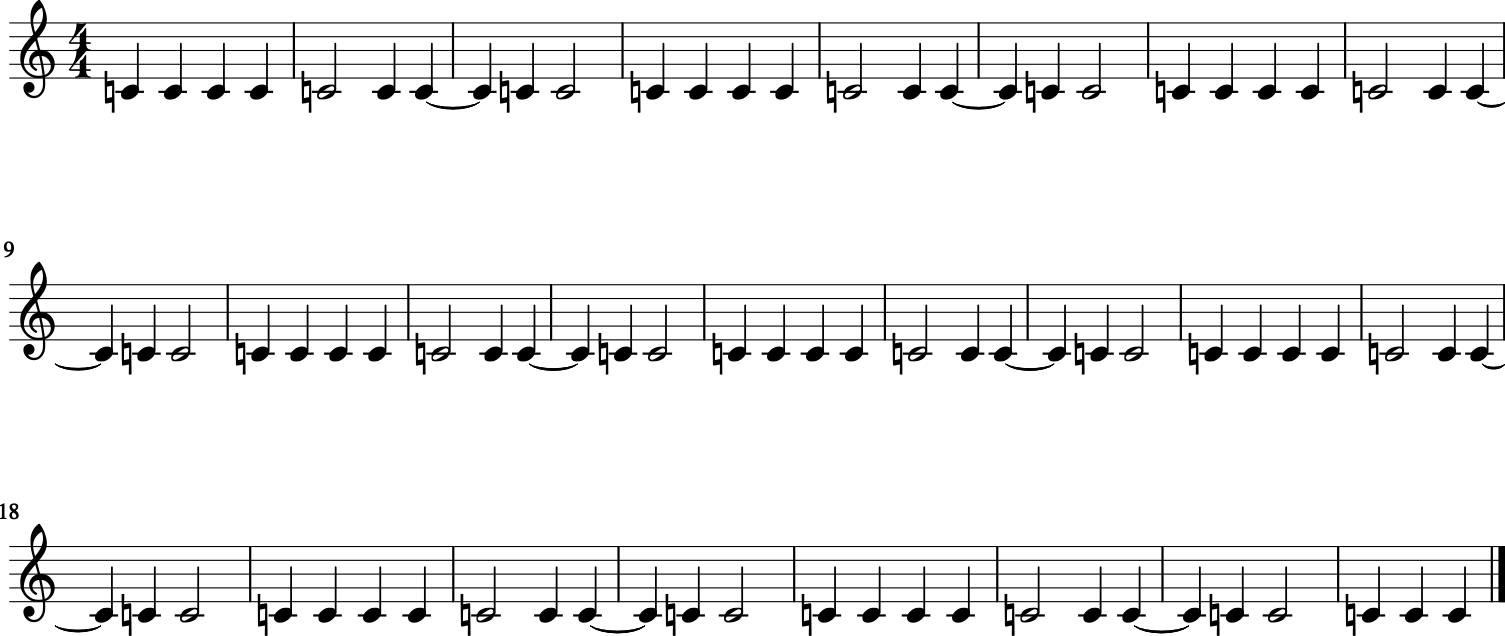

In [3]:
notes = []
for i,interval in enumerate(intervals):
    n = Note(60.0)
    n.duration = Duration(interval)
    notes.append(n)
stream1 = Stream()
stream1.append(notes)
stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()

In [ ]:
import music21
import numpy
sieve = music21.sieve.Sieve('3@2|7@1')
pitch_nums = sieve.segment()
punit = 0.50
runit = 0.25
starting_pitch = 60
pitch_nums = numpy.array(pitch_nums)
pitch_nums = starting_pitch + pitch_nums * punit
pitch_nums = list(pitch_nums)
print("Pitch:",pitch_nums)

durations = sieve.segment(segmentFormat = 'width')
durations = list(numpy.array(durations) * runit) + [2.0]
print("Durations:",durations)
durations = [music21.duration.Duration(d) for d in durations]

notes = []
for i,p in enumerate(pitch_nums):
    n = music21.note.Note(p)
    n.duration = durations[i]
    notes.append(n)

stream1 = music21.stream.Stream()
stream1.append(notes)
#stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()

In [ ]:
sieve = music21.sieve.Sieve('3@2|7@1|4@1|13@5')
pitch_nums = sieve.segment()
punit = 0.50
runit = 0.25
starting_pitch = 30
pitch_nums = numpy.array(pitch_nums)
pitch_nums = starting_pitch + pitch_nums * punit
pitch_nums = list(pitch_nums)
print("Pitch:",pitch_nums)

durations = sieve.segment(segmentFormat = 'width')
durations = list(numpy.array(durations) * runit) + [2.0]
print("Durations:",durations)
durations = [music21.duration.Duration(d) for d in durations]

notes = []
for i,p in enumerate(pitch_nums):
    n = music21.note.Note(p)
    n.duration = durations[i]
    notes.append(n)

stream1 = music21.stream.Stream()
stream1.append(notes)
stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()

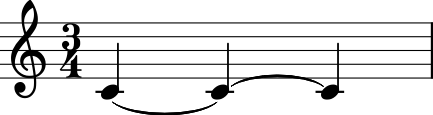

In [8]:
# handling Ties
Tie = music21.tie.Tie
c0 = Note('C4')
c0.tie = Tie('start')
c1 = Note('C4')
c1.tie = Tie('continue')
c1.tie.placement = 'above'
c2 = Note('C4')
c2.tie = Tie('stop')
s = music21.stream.Measure()
s.append([c0, c1, c2])
s.show()


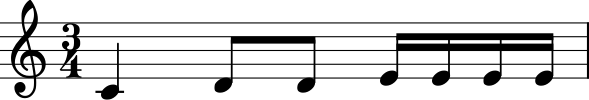

In [15]:
m = music21.stream.Measure()
c = Note('C4', type='quarter')
m.append(c)
d1 = Note('D4', type='eighth')
d2 = Note('D4', type='eighth')
m.append([d1, d2])
e1 = Note('E4', type='16th')
e2 = Note('E4', type='16th')
e3 = Note('E4', type='16th')
e3.beams.append('stop')
e4 = Note('E4', type='16th')
e4.b
m.append([e1,e2,e3,e4])
m.show()